## Preparativos

Aqui instalaremos y configuraremos la librería de root particular para esta máquina

In [1]:
# Versión de linux
!cat /etc/*release

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=20.04
DISTRIB_CODENAME=focal
DISTRIB_DESCRIPTION="Ubuntu 20.04.6 LTS"
NAME="Ubuntu"
VERSION="20.04.6 LTS (Focal Fossa)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 20.04.6 LTS"
VERSION_ID="20.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=focal
UBUNTU_CODENAME=focal


In [2]:
# Set root folder
!mkdir -p APPS
!pwd

/content


In [3]:
# Download and install root
!cd APPS && wget https://root.cern.ch/download/root_v6.28.06.Linux-ubuntu22-x86_64-gcc11.4.tar.gz
!cd APPS && tar -xf root_v6.28.06.Linux-ubuntu22-x86_64-gcc11.4.tar.gz

--2023-10-20 10:49:24--  https://root.cern.ch/download/root_v6.28.06.Linux-ubuntu22-x86_64-gcc11.4.tar.gz
Resolving root.cern.ch (root.cern.ch)... 188.184.49.144, 2001:1458:d00:55::100:c
Connecting to root.cern.ch (root.cern.ch)|188.184.49.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306541479 (292M) [application/x-gzip]
Saving to: ‘root_v6.28.06.Linux-ubuntu22-x86_64-gcc11.4.tar.gz’

root_v6.28.06.Linux 100%[===================>] 292.34M  33.3MB/s    in 9.6s    

2023-10-20 10:49:35 (30.4 MB/s) - ‘root_v6.28.06.Linux-ubuntu22-x86_64-gcc11.4.tar.gz’ saved [306541479/306541479]



Para las siguientes lineas vale la pena reiniciar el kernel

In [4]:
# Setting root paths
import sys
sys.path.append("/content/APPS/root/lib")
import ctypes
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTreePlayer.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

<CDLL '/content/APPS/root/lib/libGraf.so', handle 5ba634678010 at 0x7a21bda678e0>

# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [5]:
# Root tools
import ROOT
# Array tools
import numpy as np
# Graphics tools
import seaborn as sns
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.28/06


Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [6]:
f = ROOT.TFile.Open("http://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TTbarSel/Data_8TeV.root")

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables.

In [7]:
tree = f.Get("mini")
tree.Print()
tree.GetEntries()

14945674

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries : 14945674 : Total =      3737586466 bytes  File  Size = 1366006484 *
*        :          : Tree compression factor =   2.74                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries : 14945674 : Total  Size=   59789737 bytes  File Size  =     297928 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression= 200.68     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries : 14945674 : Total  Size=   59789885 bytes  File Size  =   44412272 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression=   1.35     *
*...................................................

Create Canvas

In [8]:
# Crear un lienzo (canvas)
canvas = ROOT.TCanvas("Canvas", "", 800, 600)

Create histograms

In [9]:
# green
color1 =  ROOT.gROOT.GetColor(11); color1 = ROOT.TColor.SetRGB(color1,166,212,156)
# red
color2 =  ROOT.gROOT.GetColor(12); color2 = ROOT.TColor.SetRGB(color2,207,100,100)
# blue
color3 =  ROOT.gROOT.GetColor(13); color3 = ROOT.TColor.SetRGB(color3,91,148,202)

In [10]:
# Histogramas vacios para variables leptonicas
leptons_num_bf = ROOT.TH1F("Leptons_num", "Lepton numbers bfc; Lepton multiplicity ; Events", 14, 0, 6)
leptons_pt_bf = ROOT.TH1F("Leptons_pT", "Leptons pT bfc; pT(GeV); Events", 60, 0, 120)
track_isol_bf = ROOT.TH1F("Tracks_isolation", "Track isolation bfc; Isolation ( % ) ; Events", 70, -0.1, 0.6)
calor_isol_bf = ROOT.TH1F("Calorimeter_isolation", "Calorimeter isolation bfc; Isolation ( % ) ; Events", 70, -0.1, 0.6)
eta_lepton_bf = ROOT.TH1F("Eta_lepton", "Eta lepton bfc; eta ; Events", 50, -3, 3)

# Histogramas vacios para variables de jets
jets_num_bf = ROOT.TH1F("Jets_num", "Jets numbers bfc; Jet multiplicity ; Events", 14, 0, 6)
jets_pt_bf = ROOT.TH1F("Jets_pT", "Jest pT bfc; pT(GeV); Events", 60, 0, 120)
eta_jets_bf = ROOT.TH1F("Eta_jets", "Eta jets bfc; eta ; Events", 50, -3, 3)
jvf_jets_bf = ROOT.TH1F("JVF_jets", "JVF Jets bfc; JVF ; Events", 50, 0, 1)
mv1_jets_bf = ROOT.TH1F("MV1_jets", "MV1 Jets bfc; MV1 ; Events",50 , 0, 1)
b_jets_num_bf = ROOT.TH1F("B_Jets_num", "b-Jets numbers bfc; Jets (#) ; Events", 14, 0, 6)

# Histogramas adicionales
met_bf = ROOT.TH1F("MET", "MET bfc; GeV; Events", 60, 0, 120)
mtw_bf = ROOT.TH1F("MTW", "MTW bfc; GeV; Events", 60, 0, 160)

Loop and fill histograms

In [11]:
# Función para construir las variables
def get_raw_variables(event):
  # Empty var
  var = {}
  # Event weight
  var["evtw"] = event.mcWeight
  # Triger electromagnético
  var["e_trig"] = event.trigE == 1
  # Triger muonico
  var["mu_trig"] = event.trigM == 1
  # Vértice válido
  var["good_vtx"] = event.hasGoodVertex == 1

  # Número de leptones
  var["lep_n"] = event.lep_n
  # PT de los leptones
  var["lep_pt"] = [x for x in event.lep_pt]
  # Dirección polar de los leptones
  var["lep_eta"] = [x for x in event.lep_eta]
  # Direccion azimutual de los leptones
  var["lep_phi"] = [x for x in event.lep_phi]
  # Energía de los leptones
  var["lep_E"] = [x for x in event.lep_E]
  # Tipo de lepton
  var["lep_type"] = [x for x in event.lep_type]
  # Track isolation lepton
  var["lep_ptcone30"] = [x for x in event.lep_ptcone30]
  # Calorimeter isolation lepton
  var["lep_etcone20"] = [x for x in event.lep_etcone20]
  # Track isolation ratio
  var["track_isolation"] = [event.lep_ptcone30[j] / event.lep_pt[j] for j in range(event.lep_n)]
  # Cluster isolation ratio
  var["cluster_isolation"] = [event.lep_etcone20[j] / event.lep_pt[j] for j in range(event.lep_n)]

  # Numero de jets
  var["jet_n"] = event.jet_n
  # PT de los Jets
  var["jet_pt"] = [x for x in event.jet_pt]
  # Eta jets
  var["jet_eta"] = [x for x in event.jet_eta]
  # JVF jets
  var["jet_jvf"] = [x for x in event.jet_jvf]
  # JVF jets
  var["jet_mv1"] = [x for x in event.jet_MV1]
  # Numero de b-jets
  var["b_jet_n"] = len([event.jet_pt[j] for j in range(event.jet_n) if event.jet_MV1[j]>=0.7892])

  # Energía transversa faltanate
  var["met"] = event.met_et
  # Angulo azimutal de la MET.
  var["met_phi"] = event.met_phi

  # Masa transversa W
  var["mtw"] = []
  # Llenado de la masa transversa
  for j in range(event.lep_n):
    # Definiciones de TLorentzVector
    Lepton = ROOT.TLorentzVector()
    MeT = ROOT.TLorentzVector()
    # Llenar los vectores de Lorentz
    Lepton.SetPtEtaPhiE(event.lep_pt[j], event.lep_eta[j], event.lep_phi[j], event.lep_E[j])
    MeT.SetPtEtaPhiE(event.met_et, 0.0, event.met_phi, event.met_et)
    # Cálculo de mTW usando TLorentz vectors
    cos_delta_phi = ROOT.TMath.Cos(Lepton.DeltaPhi(MeT))
    mTW = ROOT.TMath.Sqrt(2.0 * Lepton.Pt() * MeT.Et() * (1 - cos_delta_phi))
    # Llenado de la masa
    var["mtw"].append(mTW)

  return var

In [12]:
# Función para construir los cortes
def get_cuts(var):
  # cortes en blanco
  cuts = np.zeros(8, dtype=int)

  # 1. corte de buen vertice
  cuts[0] = 1 if var["good_vtx"] else 0

  # 2. corte de lepton trigger
  cuts[1] = 1 if (var["e_trig"] or var["mu_trig"]) and cuts[0]==1 else 0

  # 3. corte de un unico buen lepton
  for i in range(var["lep_n"]):
    if var["lep_pt"][i] >= 25000 and var["track_isolation"][i] < 0.15 and var["cluster_isolation"][i] < 0.15:
      if var["lep_type"][i] == 13 and abs(var["lep_eta"][i]) <= 2.5:
        cuts[2] += 1
      elif var["lep_type"][i] == 11 and abs(var["lep_eta"][i]) <= 2.47 and (abs(var["lep_eta"][i])<= 1.37 or abs(var["lep_eta"][i]) >= 1.52 ):
        cuts[2] += 1
  cuts[2] = 1 if cuts[2] == 1 and cuts[1]==1 else 0

  # 4. corte de por lo menos 4 jest
  cuts[3] = 1 if var["jet_n"] >= 4 and cuts[2] == 1 else 0

  # 5. corte por 4 buenos jets
  for i in range(var["jet_n"]):
    if var["jet_pt"][i] >= 50000 and abs(var["jet_eta"][i]) < 2.5:
      cuts[4] += 1
    elif var["jet_pt"][i] >= 25000 and abs(var["jet_eta"][i]) < 2.4 and var["jet_jvf"][i] > 0.5:
      cuts[4] += 1
  cuts[4] = 1 if cuts[4] >= 4 and cuts[3]==1 else 0

  # 6. por lo menos 2 b-jets
  for i in range(var["jet_n"]):
    cuts[5] += 1 if var["jet_mv1"][i] >= 0.7892 else 0
  cuts[5] = 1 if cuts[5] >= 2 and cuts[4]==1 else 0

  # 7. energia perdida
  cuts[6] = 1 if var["met"] >= 30000 and cuts[5]==1 else 0

  # 8. masa transversa del w
  cuts[7] = 1 if any(x >= 30000 for x in var["mtw"]) and cuts[6]==1 else 0

  return cuts

In [13]:
# función para llenar los histogramas antes
def fill_before_histograms(var):
  # Histogramas vacios para variables leptonicas
  leptons_num_bf.Fill(var["lep_n"])
  for i in range(var["lep_n"]):
    leptons_pt_bf.Fill(var["lep_pt"][i]/1000)
    track_isol_bf.Fill(var["track_isolation"][i])
    calor_isol_bf.Fill(var["cluster_isolation"][i])
    eta_lepton_bf.Fill(var["lep_eta"][i])
    mtw_bf.Fill(var["mtw"][i]/1000)

  # Histogramas vacios para variables de jets
  jets_num_bf.Fill(var["jet_n"])
  b_jets_num_bf.Fill(var["b_jet_n"])
  for i in range(var["jet_n"]):
    jets_pt_bf.Fill(var["jet_pt"][i]/1000)
    eta_jets_bf.Fill(var["jet_eta"][i])
    jvf_jets_bf.Fill(var["jet_jvf"][i])
    mv1_jets_bf.Fill(var["jet_mv1"][i])

  # Histogramas adicionales
  met_bf.Fill(var["met"]/1000)


In [14]:
# Total de eventos
nentries = tree.GetEntries()
# Total cuts
cuts = np.zeros(8,dtype=int)
# Para cada evento en al arbol
for i, event in enumerate(tree):
  # Print state
  print(round(100*(i+1)/nentries,2),"%",end='\r')
  # Get raw variables
  var = get_raw_variables(event)
  # Get cuts
  cuts += get_cuts(var)
  # Fill before histograms
  fill_before_histograms(var)

print("Done!")

Done!


In [15]:
var

{'evtw': 0.0,
 'e_trig': False,
 'mu_trig': True,
 'good_vtx': True,
 'lep_n': 1,
 'lep_pt': [25940.83984375],
 'lep_eta': [0.5632177591323853],
 'lep_phi': [-2.938337802886963],
 'lep_E': [30165.345703125],
 'lep_type': [13],
 'lep_ptcone30': [0.0],
 'lep_etcone20': [123.52970886230469],
 'track_isolation': [0.0],
 'cluster_isolation': [0.004761978008667559],
 'jet_n': 0,
 'jet_pt': [],
 'jet_eta': [],
 'jet_jvf': [],
 'jet_mv1': [],
 'b_jet_n': 0,
 'met': 31627.794921875,
 'met_phi': -0.42907020449638367,
 'mtw': [54447.65107829781]}

In [16]:
cuts

array([14656440, 14656440, 11533698,    61833,    59339,    10644,
           8444,     7111])

Draw absolute efficience

In [36]:
epsilons = cuts/nentries
[round(100*x ,4) for x in epsilons]

[98.0648, 98.0648, 77.1708, 0.4137, 0.397, 0.0712, 0.0565, 0.0476]

In [38]:
error_cuts = np.sqrt(epsilons*(1-epsilons)/nentries)
[round(100*x,5) for x in error_cuts]

[0.00356, 0.00356, 0.01086, 0.00166, 0.00163, 0.00069, 0.00061, 0.00056]

Text(0.5, 1.0, 'Absolute efficience')

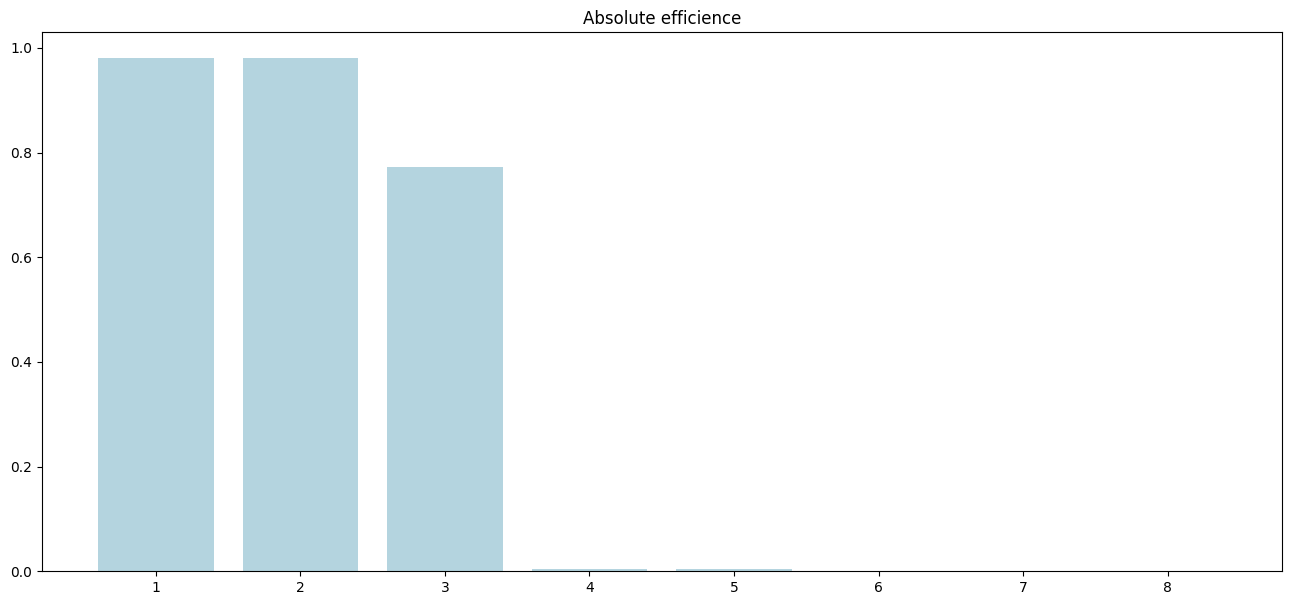

In [39]:
fig, axs = plt.subplots(1,1,figsize=(16,7))
sns.barplot(x= np.array(range(1,9)), y=epsilons,ax=axs,color='lightblue')
for i in range(1,9):
  axs.plot([i-1,i-1],[(epsilons-error_cuts)[i-1],(epsilons+error_cuts)[i-1]],color='black')
axs.set_title("Absolute efficience")

Draw relative efficience

In [42]:
epsilons = cuts/np.array([nentries] + [x for i,x in enumerate(cuts) if i < cuts.shape[0]-1 ])
[round(100*x ,4) for x in epsilons]

[98.0648, 100.0, 78.6937, 0.5361, 95.9666, 17.9376, 79.3311, 84.2136]

In [43]:
error_cuts = np.sqrt(epsilons*(1-epsilons)/np.array([nentries] + [x for i,x in enumerate(cuts) if i < cuts.shape[0]-1 ]) )
[round(100*x,5) for x in error_cuts]

[0.00356, 0.0, 0.0107, 0.00215, 0.07912, 0.1575, 0.39249, 0.39679]

Text(0.5, 1.0, 'Relative efficience')

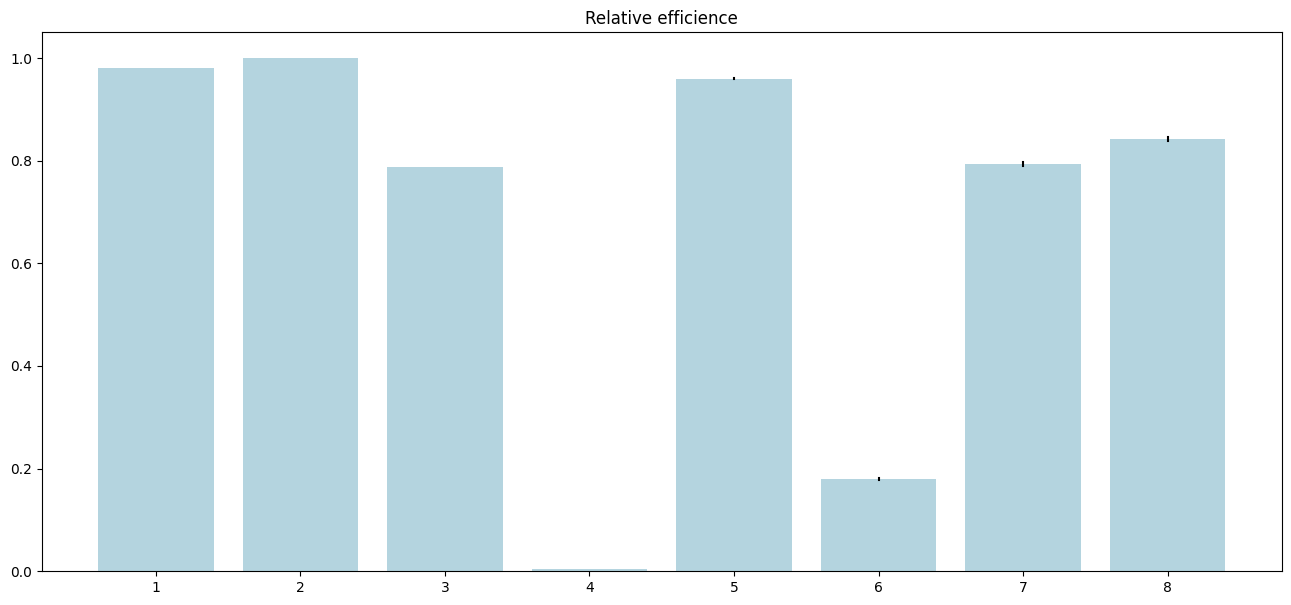

In [44]:
fig, axs = plt.subplots(1,1,figsize=(16,7))
sns.barplot(x= np.array(range(1,9)), y=epsilons,ax=axs,color='lightblue')
for i in range(1,9):
  axs.plot([i-1,i-1],[(epsilons-error_cuts)[i-1],(epsilons+error_cuts)[i-1]],color='black')
axs.set_title("Relative efficience")

<p>Draw before histograms</p>

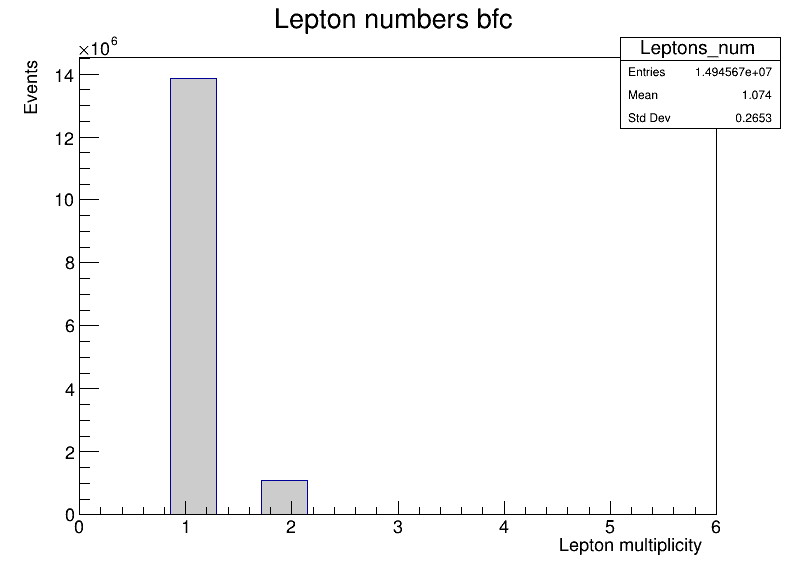

In [23]:
leptons_num_bf.SetFillColor(17)
leptons_num_bf.Draw()
canvas.Draw()

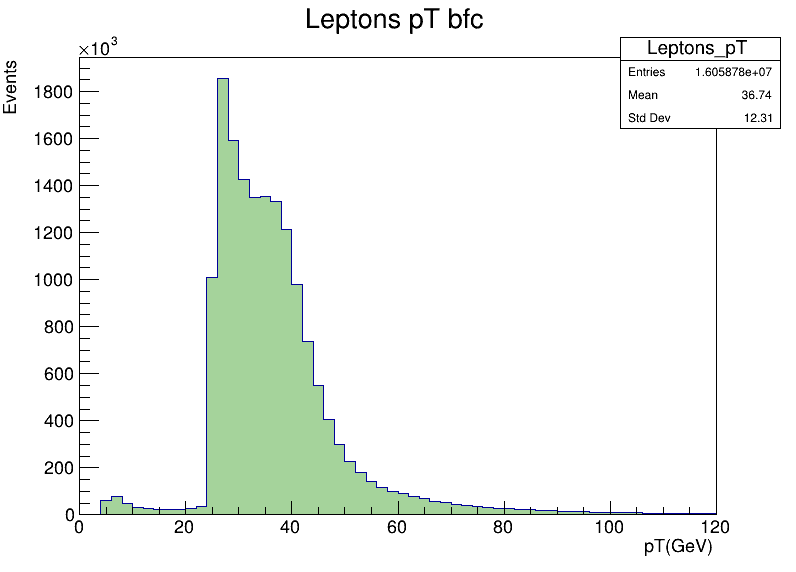

In [24]:
leptons_pt_bf.SetFillColor(11)
leptons_pt_bf.Draw()
canvas.Draw()

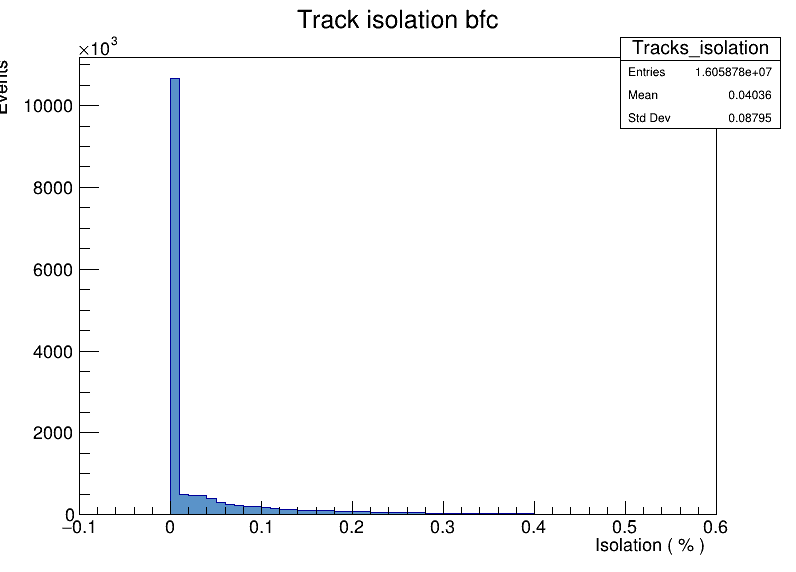

In [25]:
track_isol_bf.SetFillColor(13)
track_isol_bf.Draw()
canvas.Draw()

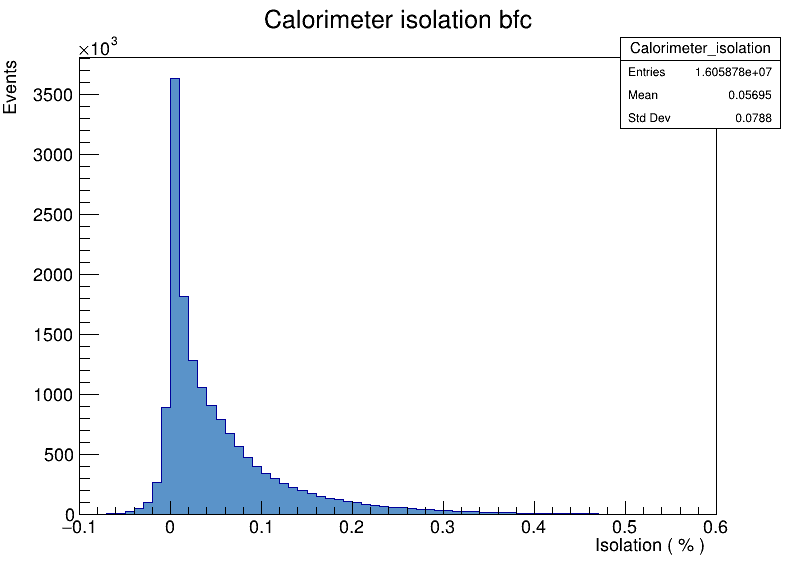

In [26]:
calor_isol_bf.SetFillColor(13)
calor_isol_bf.Draw()
canvas.Draw()

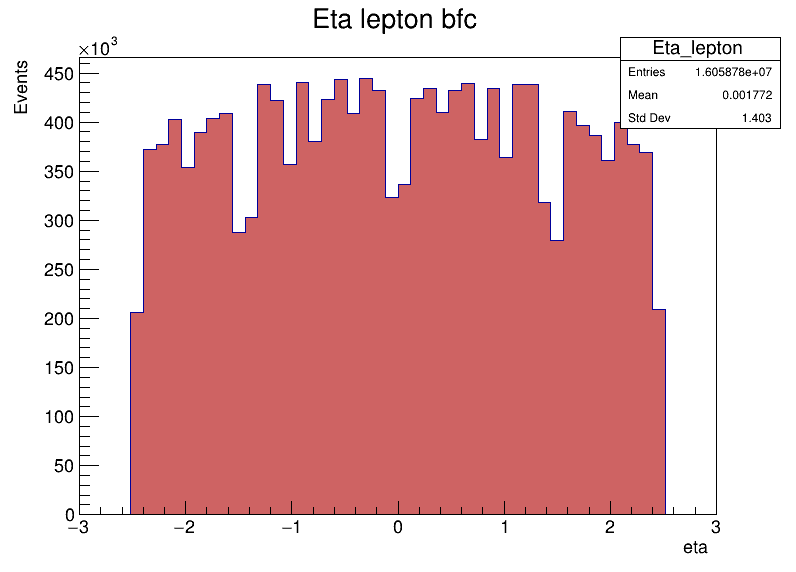

In [27]:
eta_lepton_bf.SetFillColor(12)
eta_lepton_bf.Draw()
canvas.Draw()

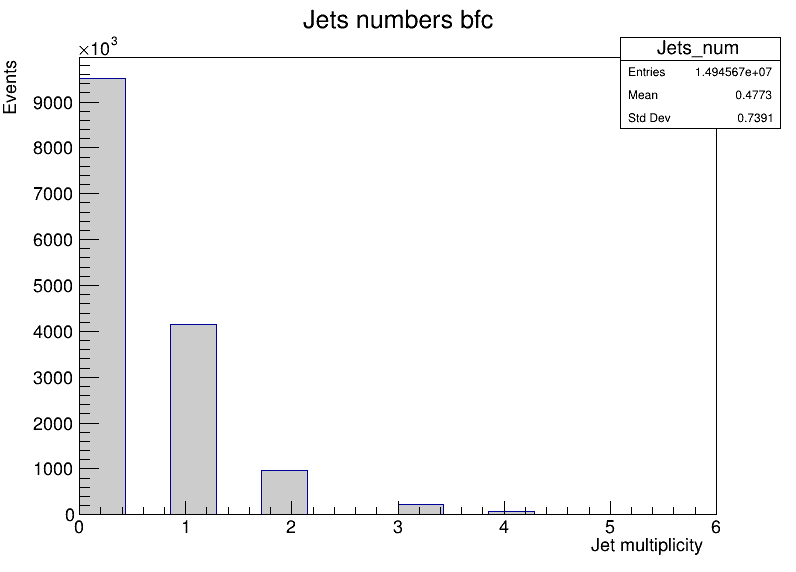

In [28]:
jets_num_bf.SetFillColor(17)
jets_num_bf.Draw()
canvas.Draw()

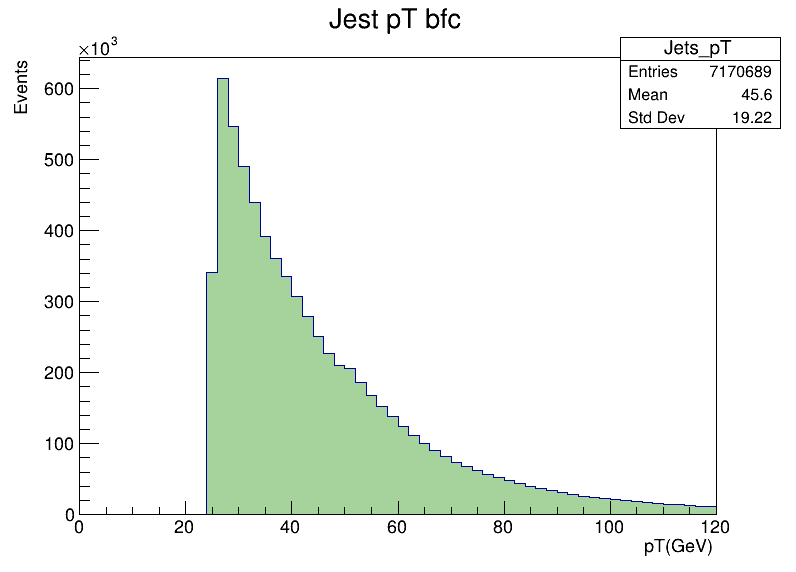

In [29]:
jets_pt_bf.SetFillColor(11)
jets_pt_bf.Draw()
canvas.Draw()

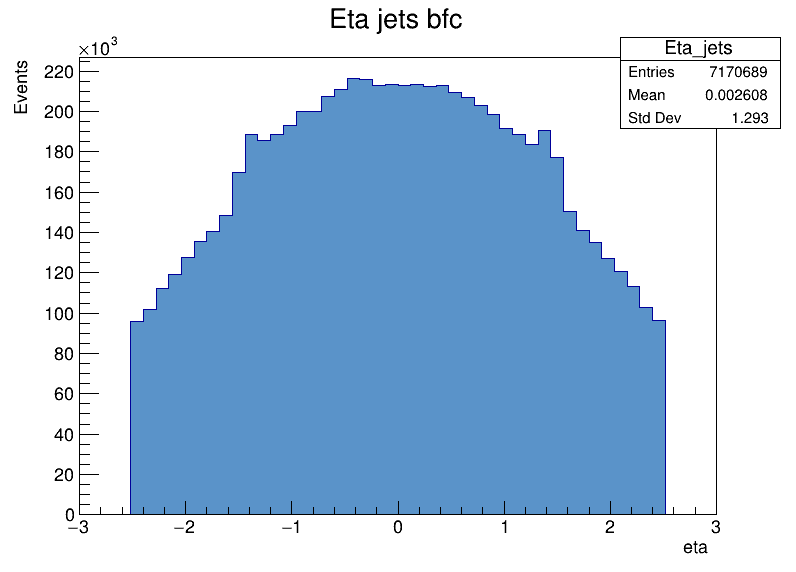

In [30]:
eta_jets_bf.SetFillColor(13)
eta_jets_bf.Draw()
canvas.Draw()

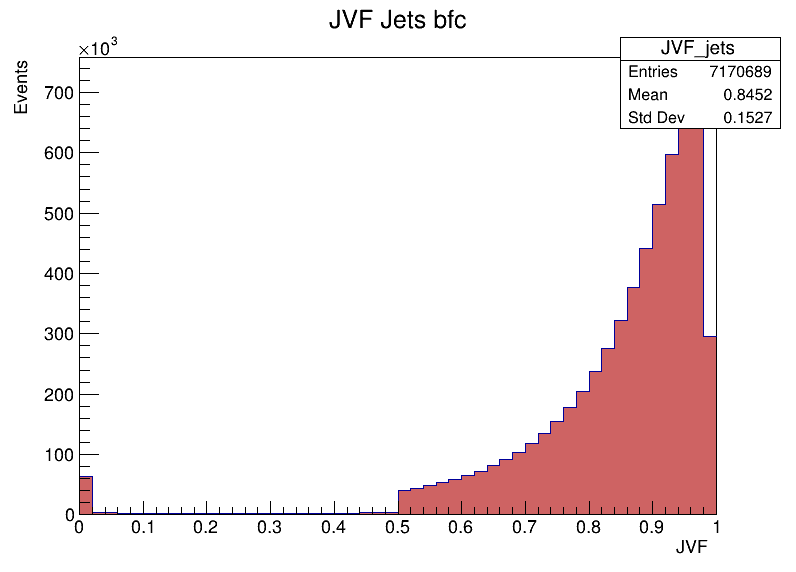

In [31]:
jvf_jets_bf.SetFillColor(12)
jvf_jets_bf.Draw()
canvas.Draw()

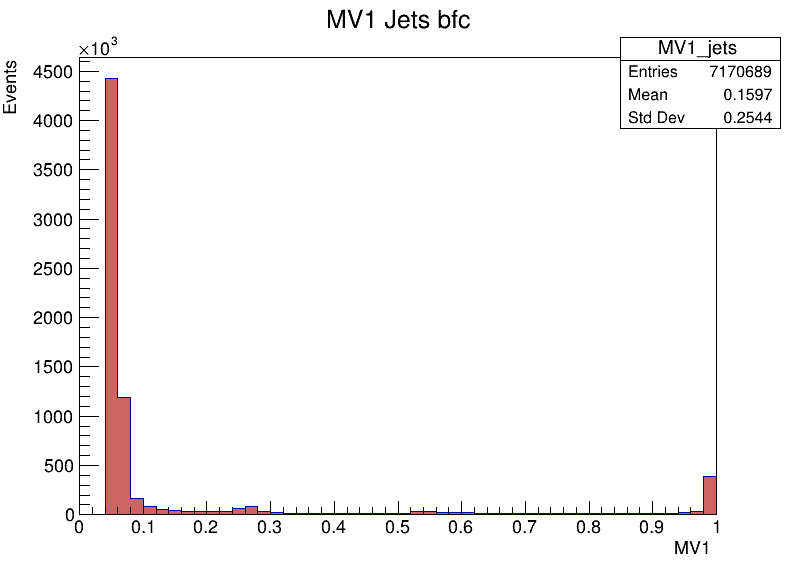

In [32]:
mv1_jets_bf.SetFillColor(12)
mv1_jets_bf.Draw()
canvas.Draw()

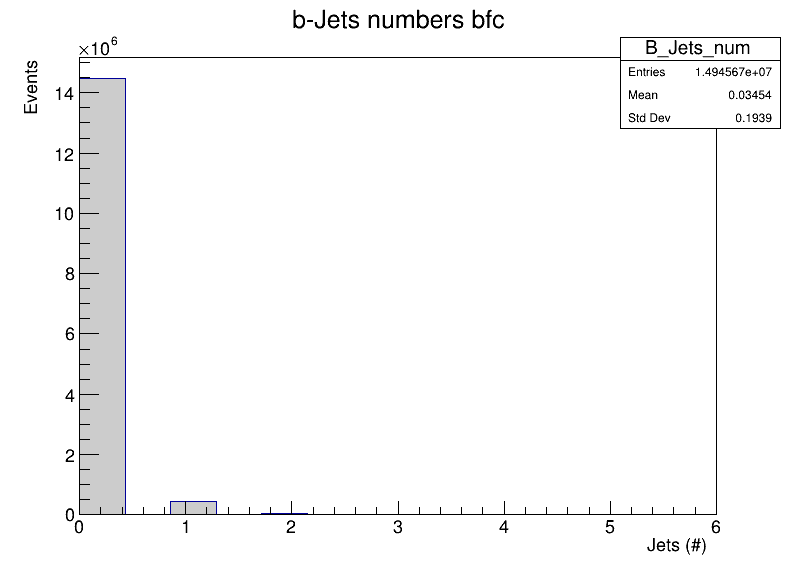

In [33]:
b_jets_num_bf.SetFillColor(17)
b_jets_num_bf.Draw()
canvas.Draw()

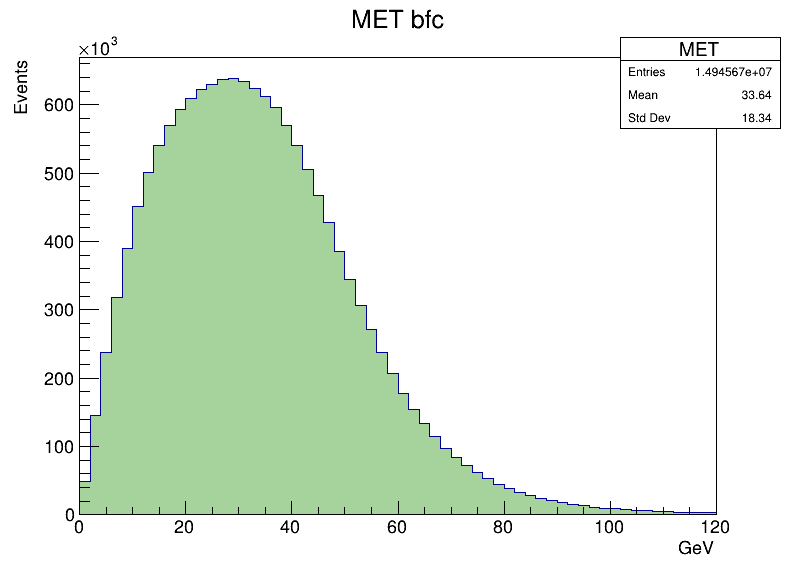

In [34]:
met_bf.SetFillColor(11)
met_bf.Draw()
canvas.Draw()

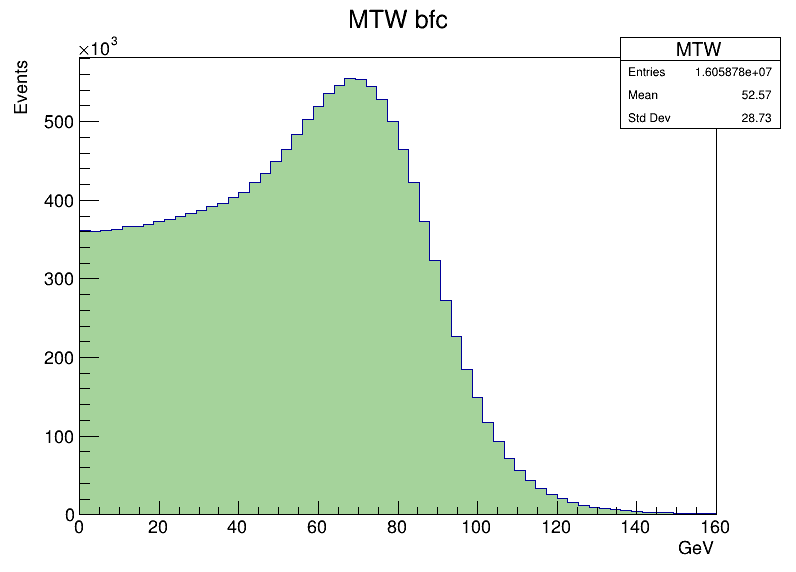

In [35]:
mtw_bf.SetFillColor(11)
mtw_bf.Draw()
canvas.Draw()